# MODELO PREDITIVO - DIABETES

# André Ricardo
*03-09-2020*

[www.andrericardo.com.br](https://www.andrericardo.com.br)

## Objetivo:

Estudo de caso da base de dados de diabetes para criar um modelo preditivo, afim de definir qual a probabilidade de ter ou não diabetes.

## Origem dos dados:

- Context:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Content:

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- Acknowledgements:

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

- Link original:
https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Dicionário de dados:

- Pregnancies ( Number of times pregnant )
- Glucose ( Plasma glucose concentration a 2 hours in an oral glucose tolerance test)
- BloodPressure (Diastolic blood pressure (mm Hg))
- SkinThickness (Triceps skin fold thickness (mm))
- Insulin (2-Hour serum insulin (mu U/ml))
- BMI (Body mass index (weight in kg/(height in m)^2))
- DiabetesPedigreeFunction (Diabetes pedigree function)
- Age (Age (years))
- Outcome (Class variable (0 or 1) 268 of 768 are 1, the others are 0)

# Análise Exploratória de dados



---

## Import das bibliotecas

In [1]:
#import de bibliotecas
import  numpy as np
import pandas as pd

#graficos
import matplotlib.pyplot as plt
import seaborn as sns

#treino/teste
from sklearn.model_selection import train_test_split

#modelos
from sklearn.linear_model import LogisticRegression

#avaliar o modelo
from sklearn import metrics


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Conhecendo nossa base

In [ ]:
#montando o drive
from google.colab import drive
drive.mount('/content/drive')

In [3]:
#carregando os dados
#dados = pd.read_csv('diabetes.csv')
dados = pd.read_csv('/content/drive/My Drive/diabetes/diabetes.csv')

## Visualizando as primeiras linhas

In [4]:
#visualizando as primeiras linhas
dados.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Verificando o tamanho

In [5]:
#verificando o tamanho
dados.shape

(768, 9)

Temos nesta base 768 registros com 9 colunas

## Colunas

In [6]:
#verificando as colunas
dados.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Tipos de dados

In [7]:
#verificando o tipo de dados
dados.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Inferência estatística

In [8]:
#veficando os dados estatisticos da base
dados.describe(include='all').T.round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


## Nulos

In [9]:
#verificando se temos dados nulos
dados.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Informações da base

In [10]:
#outra forma de ver as informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Correlação

In [11]:
#verificando a correção em forma de tabela
dados.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


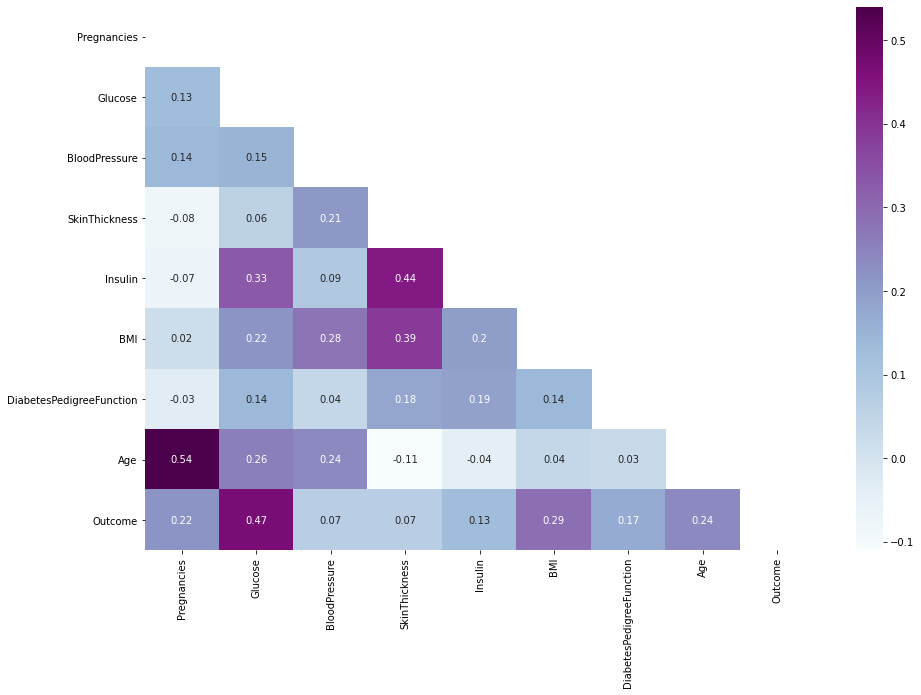

In [12]:
#verificando a correlação entre as variáveis de forma gráfica / visual
plt.figure(figsize=(15,10))
mascara=np.triu(np.ones(dados.corr().shape)).astype(np.bool)
sns.heatmap(dados.corr().round(2), annot=True, cmap="BuPu", mask = mascara)
plt.show()

## Variabilidade

In [13]:
#conhecendo a variabilidade das variaveis
dados.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

## Conhecendo as variáveis, uma de cada vez...

In [14]:
#criando uma função para gerar os graficos
def f_grafico(df, coluna, target):
    #df
    dados=df
    
    #target
    #target='Outcome'
    target=target
    
    #coluna
    #coluna='Pregnancies'
    coluna=coluna

    #nome da analise
    analise=dados[coluna]
    #cria os graficos
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)}, figsize=(15,5))
    #titulo do grafico
    f.suptitle(pd.DataFrame(analise).columns[0])
    #faz o grafico
    sns.boxplot(analise, ax=ax_box)
    sns.distplot(analise, ax=ax_hist, bins=3, color="g" )
    #remove o nome do grafico no boxplot
    ax_box.set(xlabel='')
    #exibe o grafico
    plt.show()
    #exibe tabela com os dados
    #pd.DataFrame(analise).describe().round(2).T

    plt.figure(figsize=(15, 10))
    #plt.title('Pregnancies', fontsize=20)
    #plt.title(pd.DataFrame(analise).columns[0], fontsize=20)
    #sns.distplot(dados["Pregnancies"]) #,  bins=20
    sns.distplot(analise)
    plt.show()
    #dados[["Pregnancies"]].describe().round(2).T

    g = sns.FacetGrid(dados, col=target,height=(5))
    g = g.map(sns.distplot, coluna, kde=False, color='c')

    #exibe tabela com os dados
    print(pd.DataFrame(analise).describe().round(2).T)

### Pregnancies

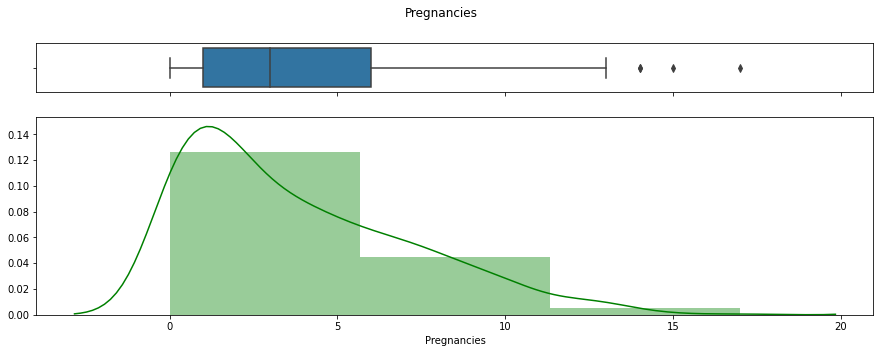

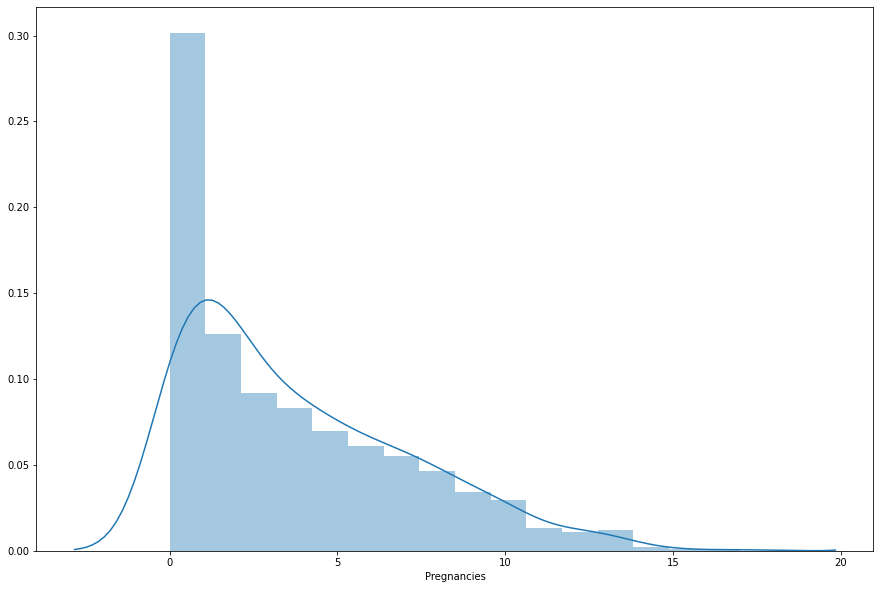

             count  mean   std  min  25%  50%  75%   max
Pregnancies  768.0  3.85  3.37  0.0  1.0  3.0  6.0  17.0


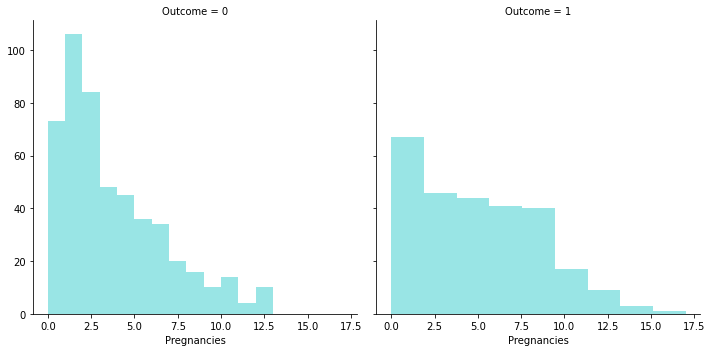

In [15]:
f_grafico(dados,'Pregnancies','Outcome')

### Glucose

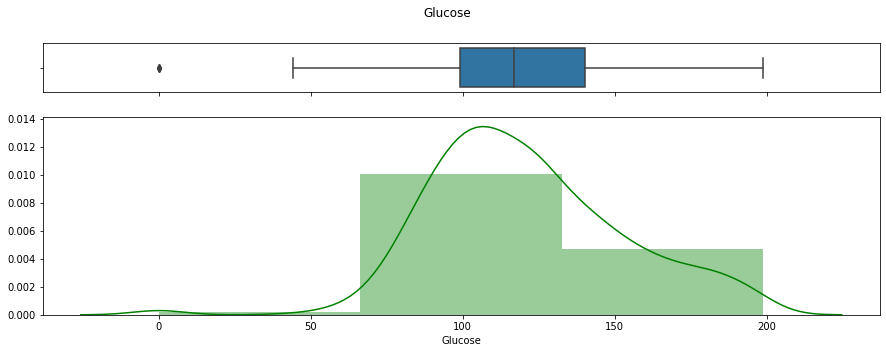

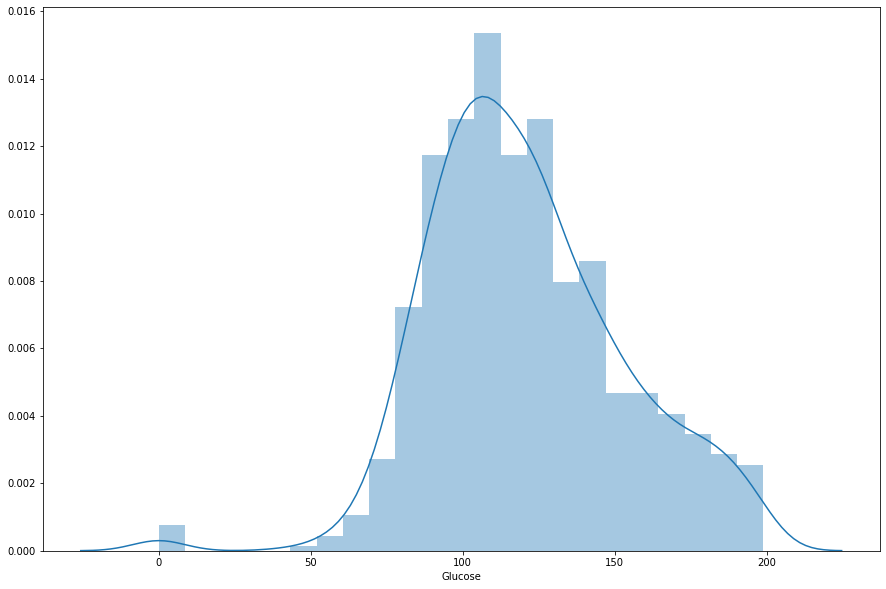

         count    mean    std  min   25%    50%     75%    max
Glucose  768.0  120.89  31.97  0.0  99.0  117.0  140.25  199.0


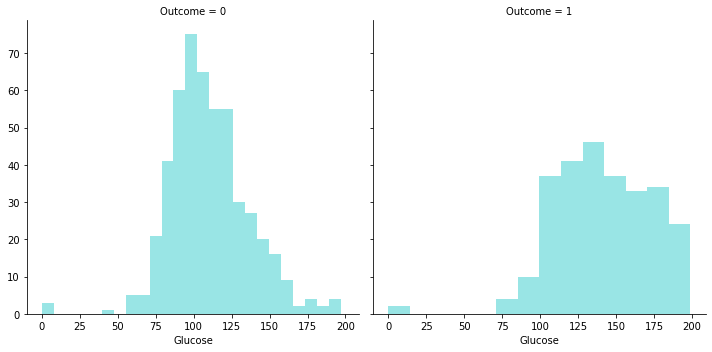

In [16]:
f_grafico(dados,'Glucose','Outcome')

### BloodPressure

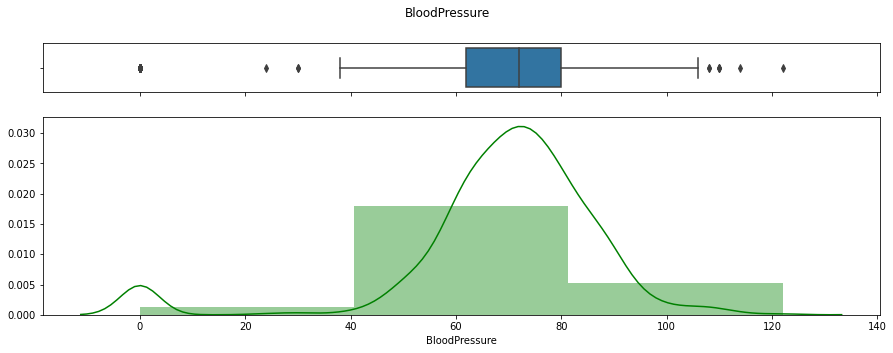

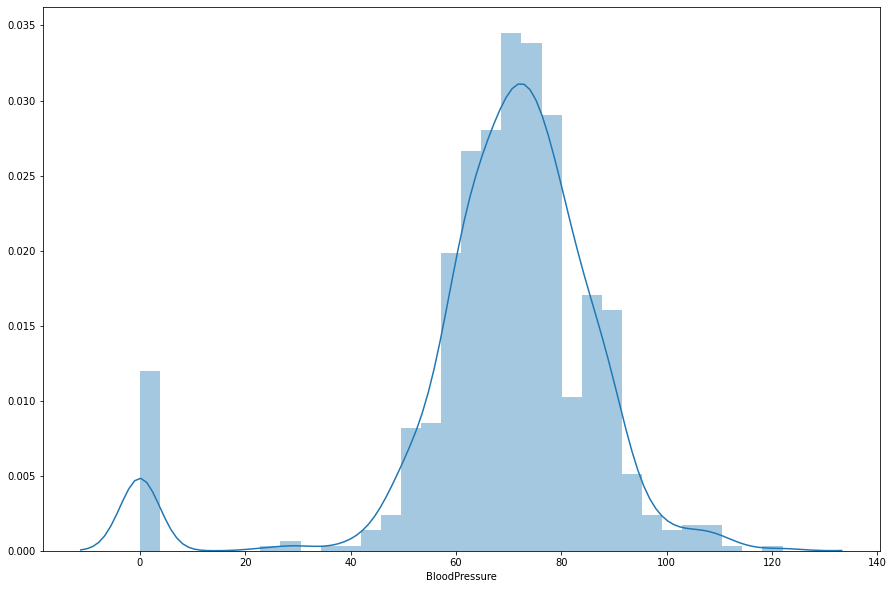

               count   mean    std  min   25%   50%   75%    max
BloodPressure  768.0  69.11  19.36  0.0  62.0  72.0  80.0  122.0


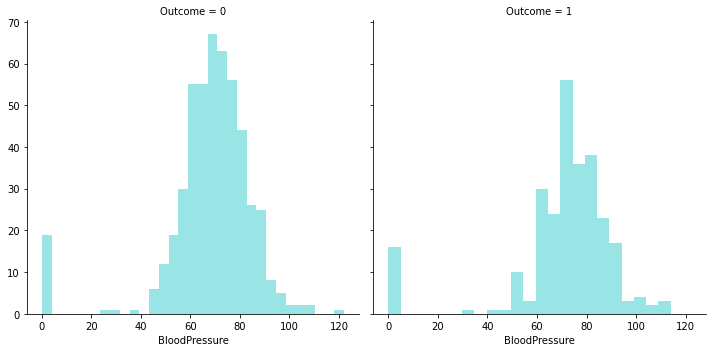

In [17]:
f_grafico(dados,'BloodPressure','Outcome')

### SkinThickness

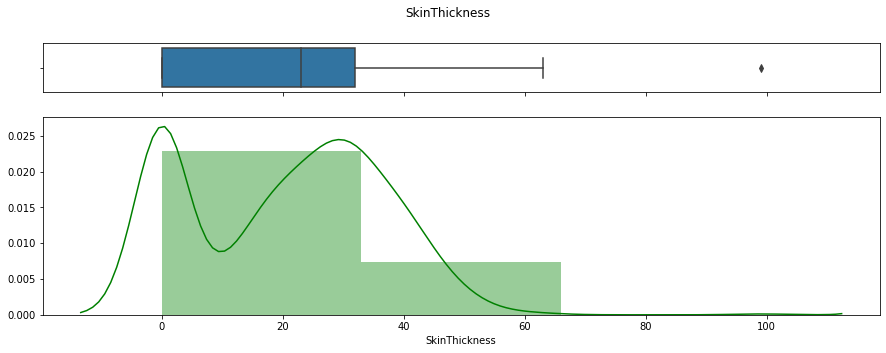

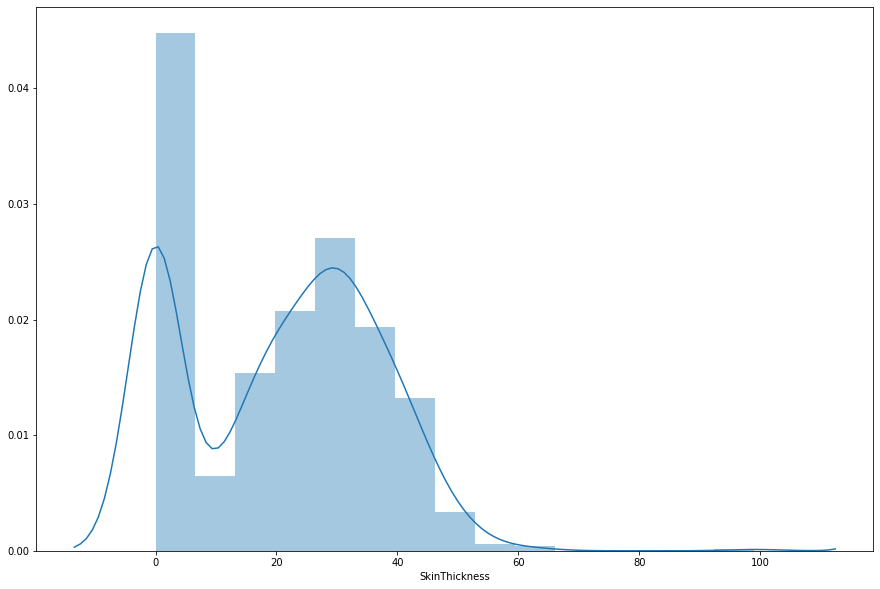

               count   mean    std  min  25%   50%   75%   max
SkinThickness  768.0  20.54  15.95  0.0  0.0  23.0  32.0  99.0


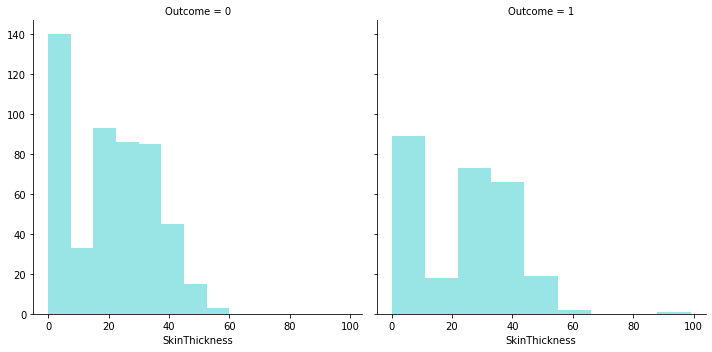

In [18]:
f_grafico(dados,'SkinThickness','Outcome')

### Insulin

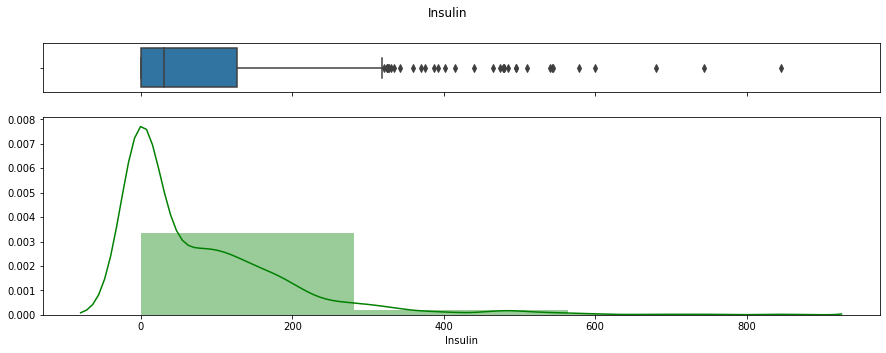

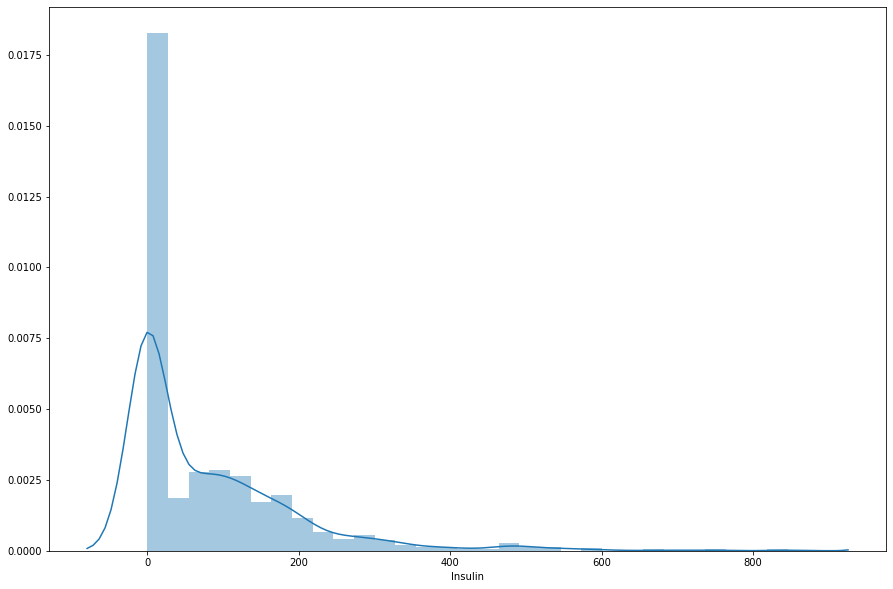

         count  mean     std  min  25%   50%     75%    max
Insulin  768.0  79.8  115.24  0.0  0.0  30.5  127.25  846.0


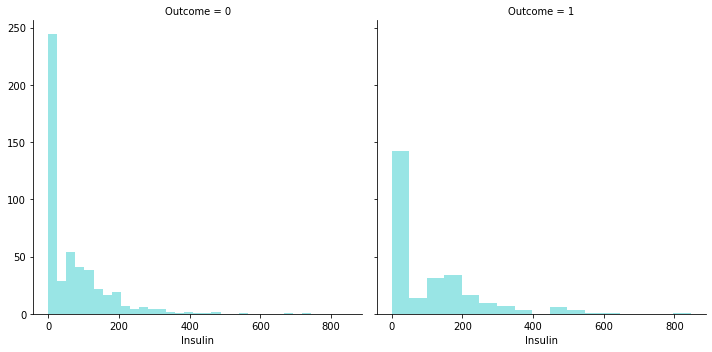

In [19]:
f_grafico(dados,'Insulin','Outcome')

### BMI

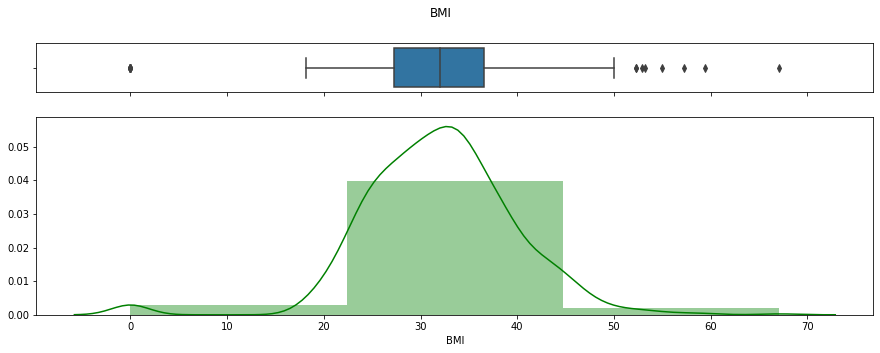

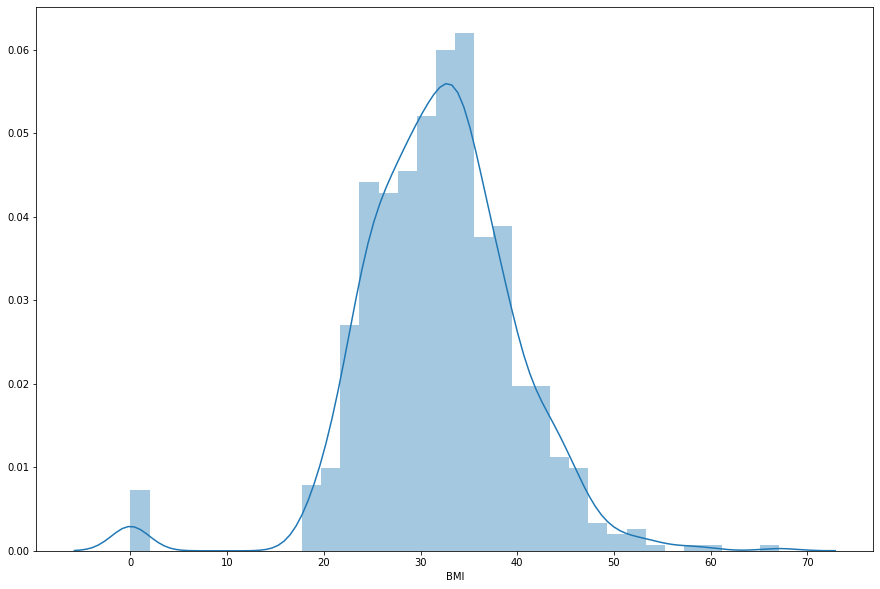

     count   mean   std  min   25%   50%   75%   max
BMI  768.0  31.99  7.88  0.0  27.3  32.0  36.6  67.1


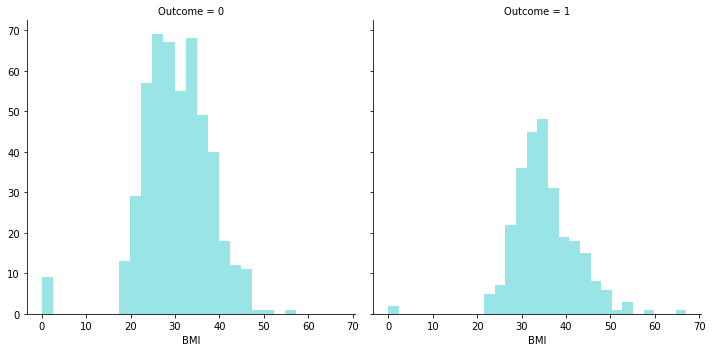

In [20]:
f_grafico(dados,'BMI','Outcome')

### DiabetesPedigreeFunction

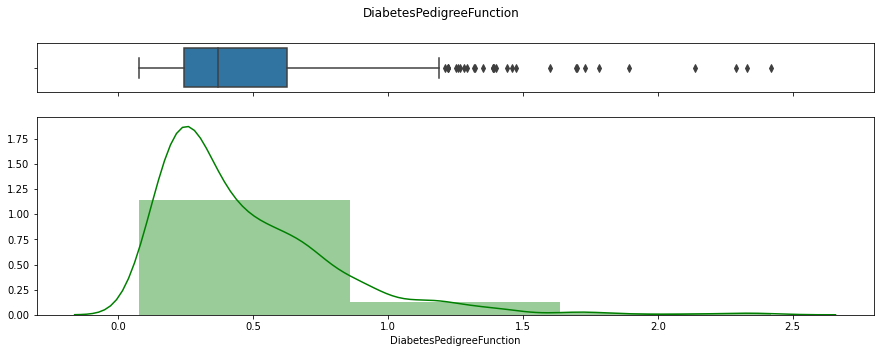

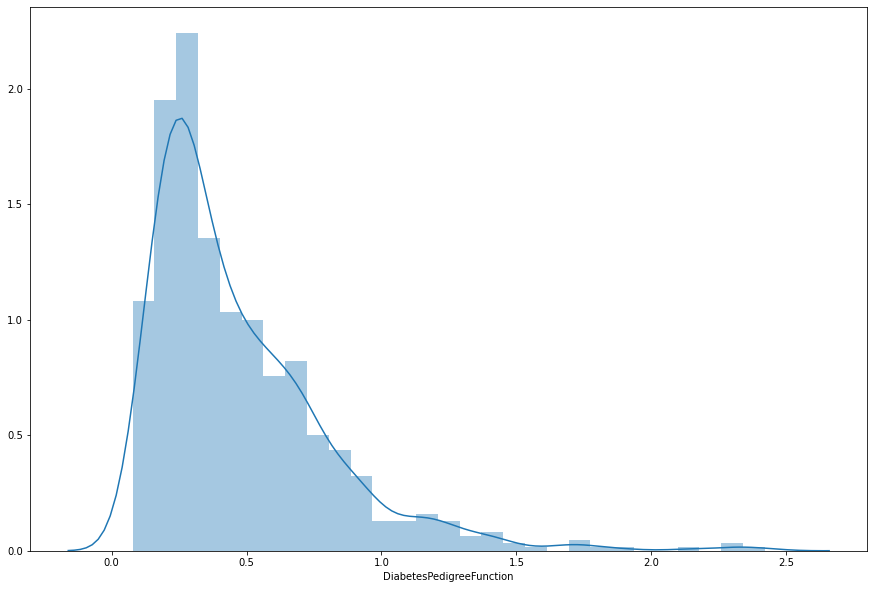

                          count  mean   std   min   25%   50%   75%   max
DiabetesPedigreeFunction  768.0  0.47  0.33  0.08  0.24  0.37  0.63  2.42


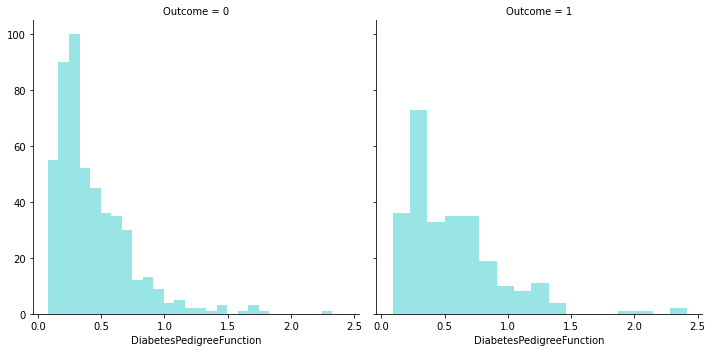

In [21]:
f_grafico(dados,'DiabetesPedigreeFunction','Outcome')

### Age

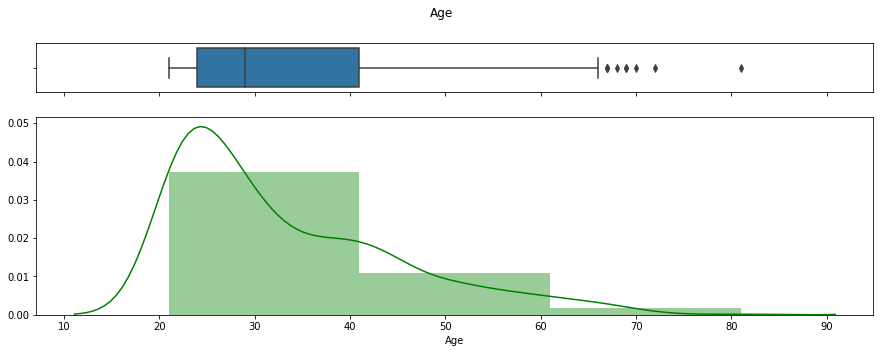

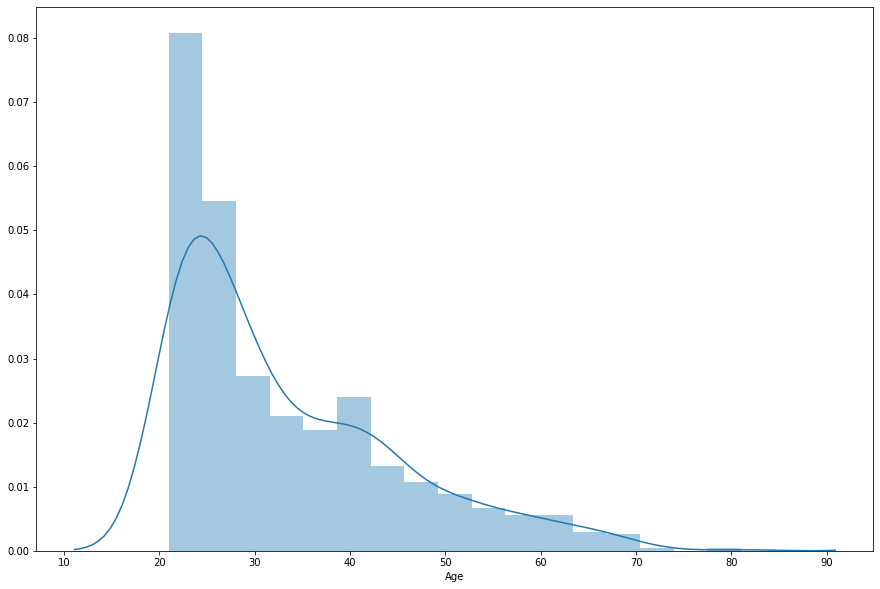

     count   mean    std   min   25%   50%   75%   max
Age  768.0  33.24  11.76  21.0  24.0  29.0  41.0  81.0


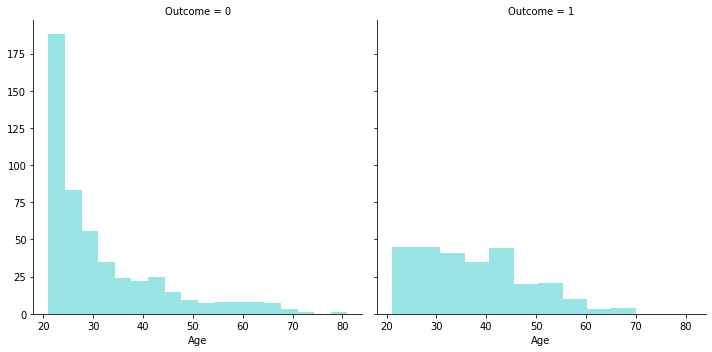

In [22]:
f_grafico(dados,'Age','Outcome')

### Outcome

In [23]:
dados['total']=1
dados.groupby('Outcome', as_index=False)['total'].count()

,Outcome,total
0,0,500
1,1,268


In [24]:
dados['total']=1
x=dados.groupby('Outcome', as_index=False)['total'].count()
x['Outcome'].tolist()

[0, 1]

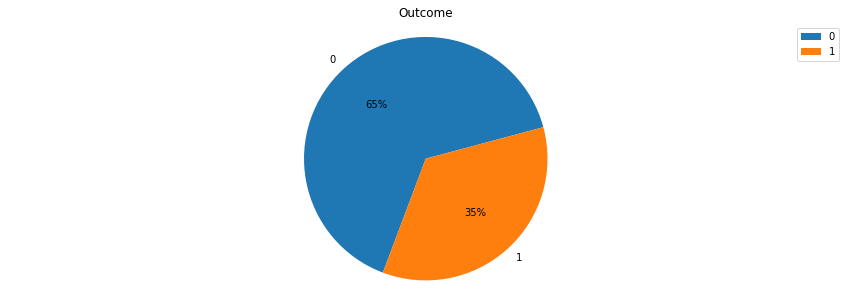

In [25]:
dados['total']=1
x=dados.groupby('Outcome', as_index=False)['total'].count()
#x=dados.groupby('Outcome', as_index=False).count()
labels = x['Outcome'].tolist()
sizes = x['total'].tolist()

# Plot
plt.figure(figsize=(15,5))
plt.title('Outcome')
plt.pie(sizes, labels=labels, autopct='%1.0f%%', shadow=False, startangle=15)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

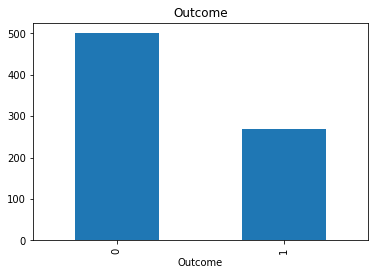

,Quantidade,total,Percentual
0,0,500,65.104167
1,1,268,34.895833


In [26]:
dados['total']=1
dados.groupby(by='Outcome')['total'].count().plot.bar()
plt.title('Outcome')
plt.show()
temp=dados.groupby('Outcome', as_index=False)['total'].count()
temp.rename(columns={'Outcome':'Quantidade'}, inplace=True)
temp['Percentual']=temp['total']/dados.shape[0]*100
temp

### Visão Geral

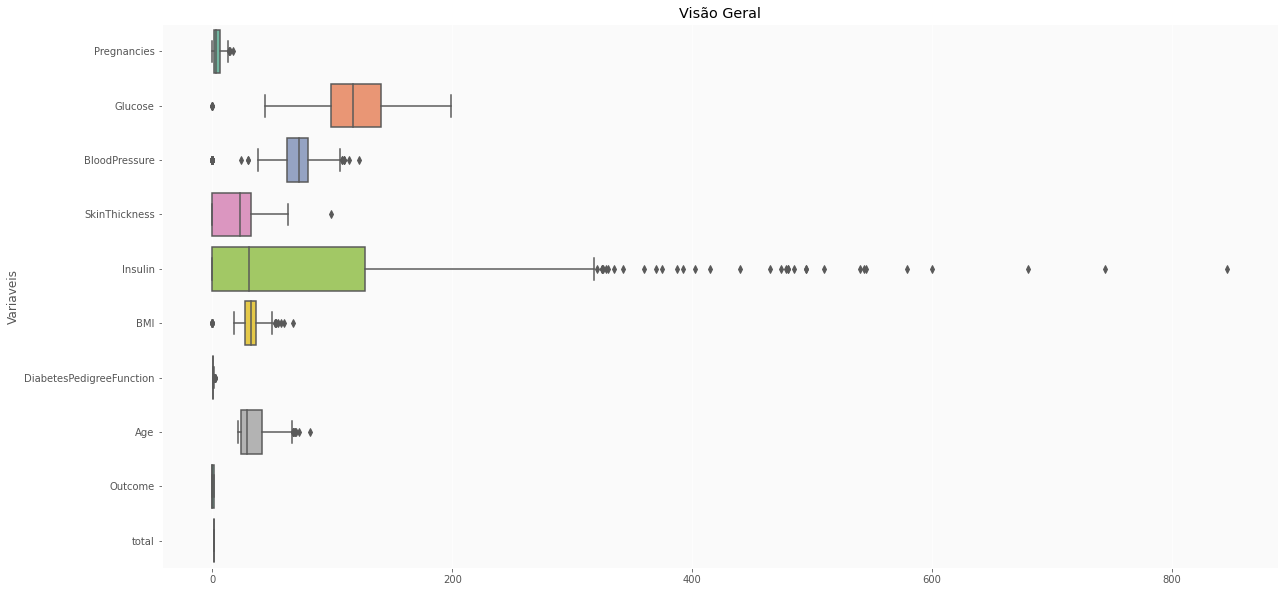

In [27]:
#Visualizando todos os graficos simultaneamente
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_facecolor('#fafafa')
#ax.set(xlim=(-10, 200))
plt.ylabel('Variaveis')
plt.title("Visão Geral")
ax = sns.boxplot(data = dados, 
  orient = 'h', 
  palette = 'Set2')

# Criando a Baseline

## Target

In [28]:
#definindo o target
target=dados['Outcome']

target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Explicativas

In [29]:
explicativas=dados.drop('Outcome', axis=1)
explicativas

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,total
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1
764,2,122,70,27,0,36.8,0.340,27,1
765,5,121,72,23,112,26.2,0.245,30,1
766,1,126,60,0,0,30.1,0.349,47,1


## Treino e Teste

In [30]:
#separando em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(explicativas, target, test_size=0.3, random_state=42)

## Gerando o Modelo

In [31]:
#Criando o modelo de regressão logistica
modelo_log=LogisticRegression(random_state=42, max_iter=200) 

#o valore default para o max_iter é 100, mas para não gerar erro, alteramos para 200, porém 164 já não daria o erro

### Treinando

In [32]:
#treinando o modelo
modelo_log.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predizendo

In [33]:
#criando as predições
predict_log=modelo_log.predict(x_teste)

### Avaliando o modelo

#### Matriz de Confusão

Tambem conhecida como matrix de erro, permite visualizar a performance de um algoritmo.
<br>
* Accuracy : (TP +TN) / (TP + TN + FP +FN)
* Precision : TP / (TP + FP)
* Recall : TP / (TP + FN)
* F1 score : 2 x ((Precision x Recall) / (Precision + Recall))



In [34]:
#criando a matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, predict_log)
cm

array([[120,  31],
       [ 30,  50]])

Text(69.0, 0.5, 'Valor Predito')

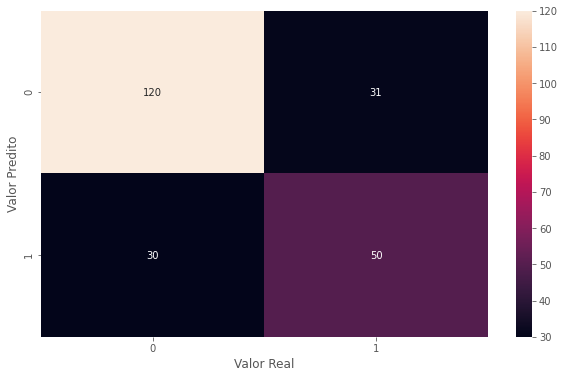

In [35]:
#desenhando a matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt='1.3g')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")

##### Acuracia

Medida que diz o quanto o nosso modelo consegue acertar com base na nossa amostra(normalmente o teste).
<br>
Verdadeiros Positivos + Verdadeiros Negativos / TUDO !
<br>
<br>
(TP +TN) / (TP + TN + FP +FN)
<br><br>
*Accuracy = (True Positives + True Negatives)/(True Positives + False Positives + False Negatives + True Negatives)*

In [36]:
#acuracia
acuracia = round(metrics.accuracy_score(y_teste, predict_log)*100,2)
acuracia

73.59

###### ROC
Representação grafica da acuracia do modelo

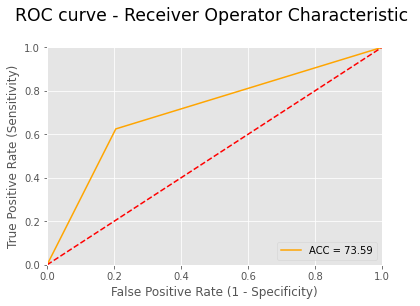

In [37]:
fpr_logreg, tpr_logreg, thresholds_logreg = metrics.roc_curve(y_teste, predict_log)

plt.plot(fpr_logreg, tpr_logreg, label = 'ACC = %0.2f' % acuracia, color = 'orange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve - Receiver Operator Characteristic \n')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

##### Precisão

Medida utilizada para indicar o quanto o nosso modelo acertou os valores positivos.
<br>
<br>
TP / (TP + FP)


In [38]:
precisao = round(metrics.precision_score(y_teste, predict_log)*100,2)
precisao

61.73

##### Recall

Medida utilizada para indicar o quanto no modelo acertou dentre os valores positivos
<br>
<br>
TP / (TP + FN)

In [39]:
recall = metrics.recall_score(y_teste, predict_log)
recall

0.625

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.52')

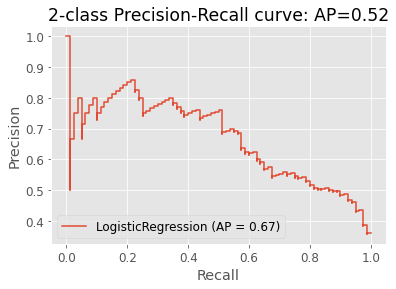

In [40]:
average_precision = metrics.average_precision_score(y_teste, predict_log)
disp = metrics.plot_precision_recall_curve(modelo_log, x_teste, y_teste)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

##### F1 score

Medida utilizada para calcular a média ponderada do modelo, buscando obter o valor 1 como valor ótimo.
<br>
<br>
2 x ((Precision x Recall) / (Precision + Recall))

In [41]:
f1 = metrics.f1_score(y_teste, predict_log)
f1

0.6211180124223602

##### Classification Report

Tabela com as métricas

In [42]:
print(metrics.classification_report(y_teste, predict_log))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

